<a href="https://colab.research.google.com/github/yungtiga/Dissertation/blob/main/Toheeb_C4_(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 43.9 MB/s eta 0:00:00


In [3]:
# ---- STEP 1: Mount Drive ----
from google.colab import drive
drive.mount('/content/drive')

import os
import pdfplumber

# ---- STEP 2: Set your dataset folder path ----
folder = "/content/drive/MyDrive/Identifying Security Controls/"

# ---- STEP 3: List PDF files ----
pdf_files = [f for f in os.listdir(folder) if f.lower().endswith(".pdf")]
print("Found PDFs:", pdf_files)

# ---- STEP 4: Test extraction for each PDF ----
results = {}

for f in pdf_files:
    path = os.path.join(folder, f)
    print("\nChecking:", f)
    try:
        with pdfplumber.open(path) as pdf:
            text = ""
            for page in pdf.pages[:3]:   # check first 3 pages
                extracted = page.extract_text()
                if extracted:
                    text += extracted.strip() + "\n"

        print("Extracted text length:", len(text))
        results[f] = len(text)

        # Quick classification
        if len(text) < 80:
            print("⚠️  Possible scanned image-based PDF → OCR needed")
        else:
            print("✅  Text-based PDF → Ready for corpus extraction")

    except Exception as e:
        print("❌ Error reading file:", e)
        results[f] = "error"

print("\n--- SUMMARY ---")
for f, length in results.items():
    msg = "TEXT-BASED" if isinstance(length, int) and length >= 80 else "SCANNED/NEEDS OCR"
    print(f"{f}: {msg} (score: {length})")

Mounted at /content/drive
Found PDFs: ['NIST.SP.800-53r5.pdf', 'CIS_Controls_Community_Defense_Model_2.0___Online_2022_0307.pdf', 'NIST.CSWP.29.pdf', 'NIST.SP.1800-37.pdf', 'CIS Control V8.pdf', 'NQA-ISO-27001-Implementation-Guide.pdf', 'ISO27001_ExOv.pdf']

Checking: NIST.SP.800-53r5.pdf
Extracted text length: 4045
✅  Text-based PDF → Ready for corpus extraction

Checking: CIS_Controls_Community_Defense_Model_2.0___Online_2022_0307.pdf
Extracted text length: 7109
✅  Text-based PDF → Ready for corpus extraction

Checking: NIST.CSWP.29.pdf
Extracted text length: 2948
✅  Text-based PDF → Ready for corpus extraction

Checking: NIST.SP.1800-37.pdf
Extracted text length: 4376
✅  Text-based PDF → Ready for corpus extraction

Checking: CIS Control V8.pdf
Extracted text length: 1833
✅  Text-based PDF → Ready for corpus extraction

Checking: NQA-ISO-27001-Implementation-Guide.pdf
Extracted text length: 856
✅  Text-based PDF → Ready for corpus extraction

Checking: ISO27001_ExOv.pdf
Extracted te

In [4]:
base_path = "/content/drive/MyDrive/Identifying Security Controls/"
raw_text_path = os.path.join(base_path, "raw_text")

os.makedirs(raw_text_path, exist_ok=True)
raw_text_path

'/content/drive/MyDrive/Identifying Security Controls/raw_text'

In [5]:
import pdfplumber
import os

pdf_folder = "/content/drive/MyDrive/Identifying Security Controls/"
output_folder = "/content/drive/MyDrive/Identifying Security Controls/raw_text/"

pdf_files = [f for f in os.listdir(pdf_folder) if f.lower().endswith(".pdf")]

for file in pdf_files:
    input_path = os.path.join(pdf_folder, file)
    output_path = os.path.join(output_folder, file.replace(".pdf", ".txt"))

    print("Extracting →", file)

    full_text = ""
    with pdfplumber.open(input_path) as pdf:
        for page in pdf.pages:
            text = page.extract_text()
            if text:
                full_text += text + "\n"

    with open(output_path, "w", encoding="utf-8") as f:
        f.write(full_text)

    print("Saved:", output_path)

print("\n Extraction complete! All TXT files saved.")

Extracting → NIST.SP.800-53r5.pdf
Saved: /content/drive/MyDrive/Identifying Security Controls/raw_text/NIST.SP.800-53r5.txt
Extracting → CIS_Controls_Community_Defense_Model_2.0___Online_2022_0307.pdf
Saved: /content/drive/MyDrive/Identifying Security Controls/raw_text/CIS_Controls_Community_Defense_Model_2.0___Online_2022_0307.txt
Extracting → NIST.CSWP.29.pdf
Saved: /content/drive/MyDrive/Identifying Security Controls/raw_text/NIST.CSWP.29.txt
Extracting → NIST.SP.1800-37.pdf
Saved: /content/drive/MyDrive/Identifying Security Controls/raw_text/NIST.SP.1800-37.txt
Extracting → CIS Control V8.pdf
Saved: /content/drive/MyDrive/Identifying Security Controls/raw_text/CIS Control V8.txt
Extracting → NQA-ISO-27001-Implementation-Guide.pdf
Saved: /content/drive/MyDrive/Identifying Security Controls/raw_text/NQA-ISO-27001-Implementation-Guide.txt
Extracting → ISO27001_ExOv.pdf
Saved: /content/drive/MyDrive/Identifying Security Controls/raw_text/ISO27001_ExOv.txt

 Extraction complete! All TXT

In [6]:
import os
import pandas as pd

BASE_PATH = "/content/drive/MyDrive/Identifying Security Controls/raw_text"

documents = []

for filename in os.listdir(BASE_PATH):
    if filename.endswith(".txt"):
        with open(os.path.join(BASE_PATH, filename), "r", encoding="utf-8") as f:
            text = f.read()
            documents.append({
                "document_name": filename,
                "text": text
            })

df_docs = pd.DataFrame(documents)
df_docs.head()

document_name  \
0                               NIST.SP.800-53r5.txt   
1  CIS_Controls_Community_Defense_Model_2.0___Onl...   
2                                   NIST.CSWP.29.txt   
3                                NIST.SP.1800-37.txt   
4                                 CIS Control V8.txt   

                                                text  
0  NIST Special Publication 800-53\nRevision 5\nS...  
1  CIS Community\nDefense Model\nVersion 2.0\nCIS...  
2  The NIST Cybersecurity\nFramework (CSF) 2.0\nN...  
3  NIST SPECIAL PUBLICATION 1800-37\nAddressing V...  
4  CIS CIS Asset Type Security Title Description ...

In [7]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 5_000_000  # increasing to 5 million characters

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)
    doc = nlp(text)
    tokens = [
        token.lemma_.lower()
        for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return " ".join(tokens)

df_docs["clean_text"] = df_docs["text"].apply(preprocess)

In [8]:
control_keywords = [
    "access control", "encryption", "authentication", "audit logging", "risk assessment",
    "incident response", "asset management", "vulnerability", "monitoring",
    "business continuity", "backup", "network security"
]

def extract_controls(text):
    found = []
    for kw in control_keywords:
        if kw in text.lower():
            found.append(kw)
    return found

df_docs["controls_detected"] = df_docs["clean_text"].apply(extract_controls)

In [9]:
weakness_indicators = [
    "should", "may", "as appropriate", "as needed", "reasonable",
    "to the extent possible", "best efforts"
]

def detect_weaknesses(text):
    found = []
    for w in weakness_indicators:
        if w in text.lower():
            found.append(w)
    return found

df_docs["weaknesses"] = df_docs["clean_text"].apply(detect_weaknesses)

In [10]:
standard_controls = set(control_keywords)

def coverage_score(controls):
    return len(set(controls) & standard_controls) / len(standard_controls)

df_docs["coverage"] = df_docs["controls_detected"].apply(coverage_score)

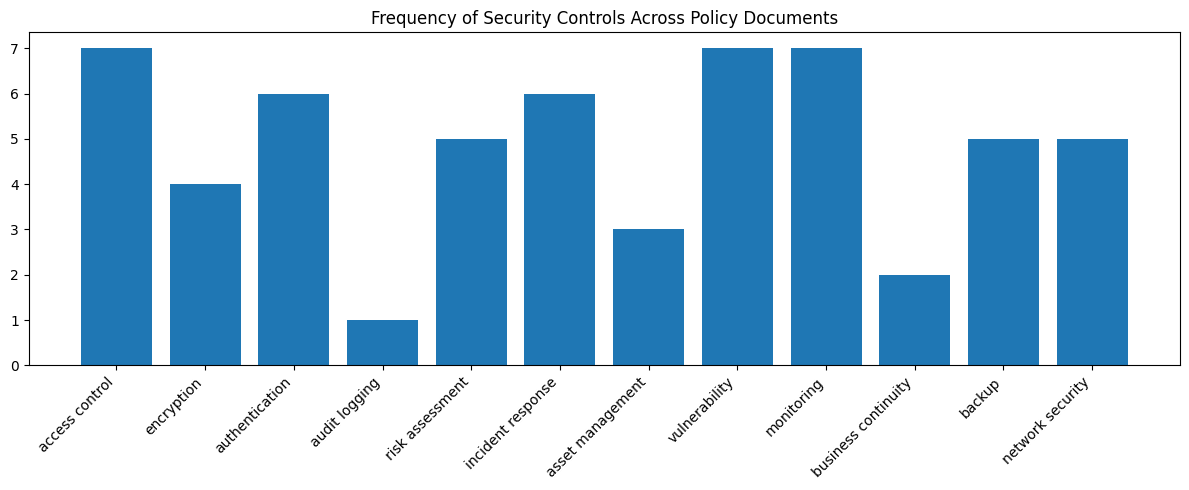

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

all_controls = Counter()

for lst in df_docs["controls_detected"]:
    all_controls.update(lst)

plt.figure(figsize=(12,5))
plt.bar(all_controls.keys(), all_controls.values())
plt.xticks(rotation=45, ha='right')
plt.title("Frequency of Security Controls Across Policy Documents")
plt.tight_layout()
plt.show()

/tmp/ipython-input-1941067479.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


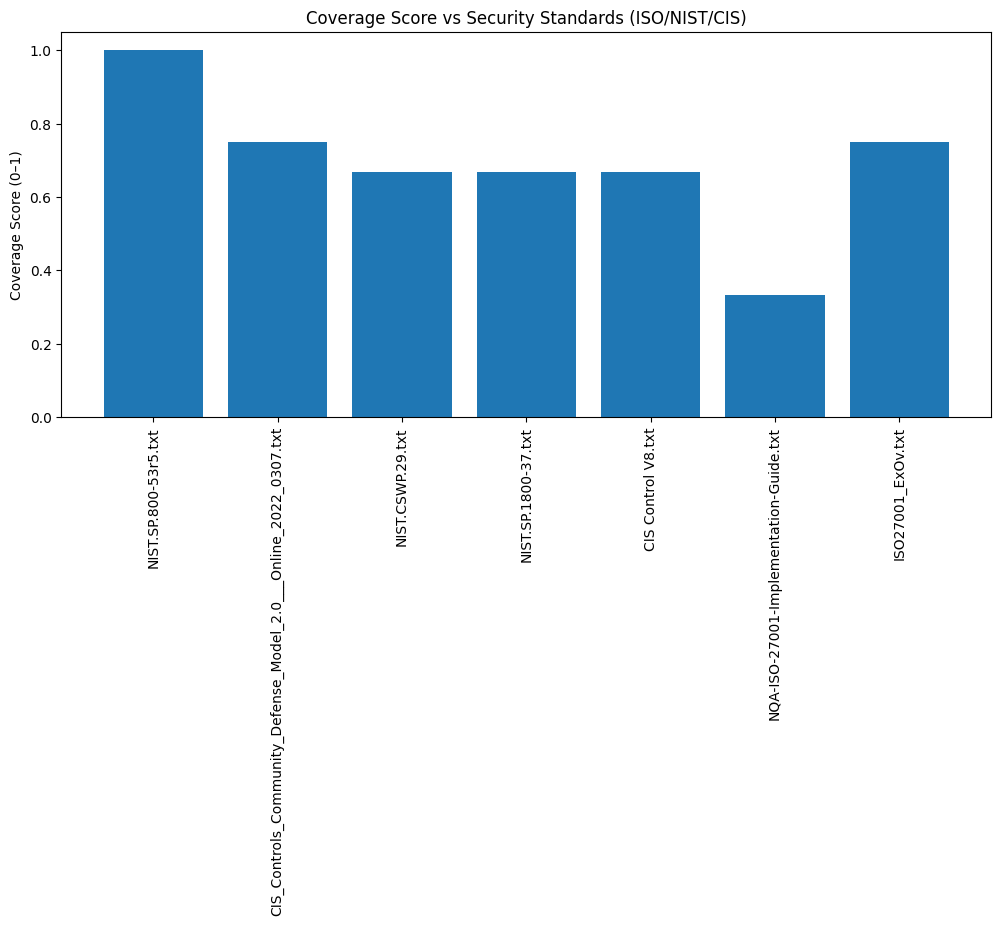

In [12]:
plt.figure(figsize=(12,5))
plt.bar(df_docs["document_name"], df_docs["coverage"])
plt.xticks(rotation=90)
plt.title("Coverage Score vs Security Standards (ISO/NIST/CIS)")
plt.ylabel("Coverage Score (0–1)")
plt.tight_layout()
plt.show()

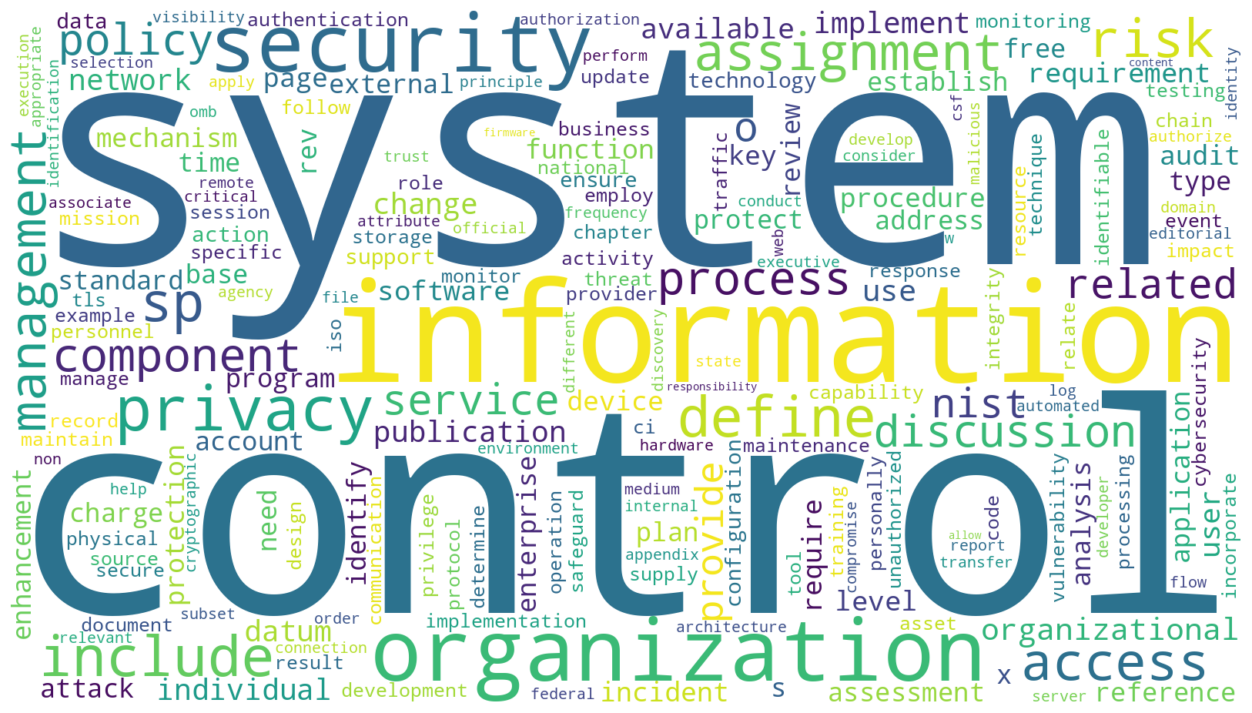

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all clean text into one large string
all_text = " ".join(df_docs["clean_text"].tolist())

wordcloud = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    max_words=200,
    collocations=False  # avoid merging terms incorrectly
).generate(all_text)

plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


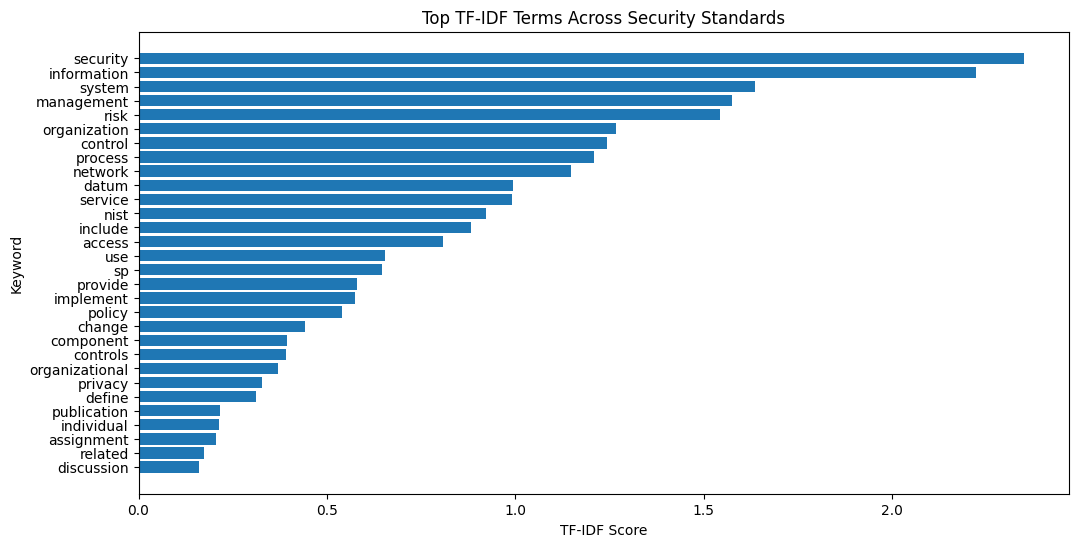

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=30)  # top 30 keywords
tfidf_matrix = vectorizer.fit_transform(df_docs["clean_text"])

feature_names = vectorizer.get_feature_names_out()
scores = tfidf_matrix.sum(axis=0).A1  # sum importance across all documents

tfidf_df = pd.DataFrame({
    "term": feature_names,
    "score": scores
}).sort_values(by="score", ascending=False)
plt.figure(figsize=(12, 6))
plt.barh(tfidf_df["term"], tfidf_df["score"])
plt.gca().invert_yaxis()
plt.title("Top TF-IDF Terms Across Security Standards")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keyword")
plt.show()

In [15]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# ---- 1. Load SpaCy NER model ----
# You can later use legal-specific model if available
nlp_ner = spacy.load("en_core_web_sm")
nlp_ner.max_length = 5_000_000  # increasing to 5 million characters

# ---- 2. Named Entity Recognition ----
def extract_entities(text):
    doc = nlp_ner(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

df_docs["entities"] = df_docs["text"].apply(extract_entities)

# ---- 3. Simple Relation Extraction ----
# Here we try to extract tuples: (subject/role, action, object/control)
action_keywords = ["shall", "must", "should", "implement", "protect", "monitor", "maintain", "enforce"]

def extract_relations(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    relations = []
    for sent in sentences:
        sent_lower = sent.lower()
        for action in action_keywords:
            if action in sent_lower:
                relations.append(sent.strip())
    return relations

df_docs["relations"] = df_docs["text"].apply(extract_relations)

# ---- 4. Clause-to-Standard Mapping ----
# Define simplified standard control statements (can expand)
standard_clauses = {
    "ISO27001": [
        "establish information security policies",
        "implement access control",
        "perform risk assessment",
        "incident response procedures"
    ],
    "NIST": [
        "identify assets and data",
        "control access to systems",
        "monitor security events",
        "backup critical information"
    ],
    "CIS": [
        "inventory of hardware and software",
        "secure configuration of devices",
        "audit logging",
        "vulnerability management"
    ]
}

# Flatten all standards into a list
all_standard_clauses = []
standard_mapping = []
for std, clauses in standard_clauses.items():
    for c in clauses:
        all_standard_clauses.append(c)
        standard_mapping.append(std)

# Vectorize clauses and document sentences
vectorizer = TfidfVectorizer()
vectorizer.fit(all_standard_clauses)

def map_to_standard(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    mappings = []
    for sent in sentences:
        sent_vec = vectorizer.transform([sent])
        std_vec = vectorizer.transform(all_standard_clauses)
        sims = cosine_similarity(sent_vec, std_vec)[0]
        max_idx = sims.argmax()
        if sims[max_idx] > 0.3:  # similarity threshold
            mappings.append((sent.strip(), standard_mapping[max_idx], round(sims[max_idx], 2)))
    return mappings

df_docs["standard_mappings"] = df_docs["text"].apply(map_to_standard)

# ---- 5. Quick summary ----
for idx, row in df_docs.iterrows():
    print("\nDocument:", row["document_name"])
    print("Entities:", row["entities"][:5])  # first 5 for preview
    print("Relations:", row["relations"][:5])
    print("Mapped Clauses:", row["standard_mappings"][:5])


Document: NIST.SP.800-53r5.txt
Entities: [('Revision 5\nSecurity', 'LAW'), ('Revision 5\nSecurity', 'LAW'), ('https://doi.org/10.6028/NIST.SP.800-53r5', 'PERSON'), ('September 2020', 'DATE'), ('PAGE XVII\n', 'PERSON')]
Relations: ['Such information security\nstandards and guidelines shall not apply to national security systems without the express\napproval of the appropriate federal officials exercising policy authority over such systems.', 'This\nguideline is consistent with the requirements of the Office of Management and Budget (OMB)\nCircular A-130.\nNothing in this publication should be taken to contradict the standards and guidelines made\nmandatory and binding on federal agencies by the Secretary of Commerce under statutory\nauthority.', 'Nor should these guidelines be interpreted as altering or superseding the existing\nauthorities of the Secretary of Commerce, OMB Director, or any other federal official.', 'ITL develops tests, test methods, reference\ndata, proof of concept i

In [16]:
!pip install gensim

import gensim
from gensim.models import Word2Vec

# Flatten sentences for training Word2Vec
sentences = [sent.split() for doc in df_docs['clean_text'] for sent in doc.split('.')]
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 53.1 MB/s eta 0:00:00


In [17]:
import spacy
import re

nlp = spacy.load("en_core_web_sm")
nlp.max_length = 5_000_000  # increasing to 5 million characters

def preprocess_text(text):
    # remove extra spaces and unwanted characters
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9.,;:()\-]', ' ', text)
    return text.lower()

def sentence_segmentation_spacy(text):
    doc = nlp(text)
    return [sent.text for sent in doc.sents]

def clean_sentences(sentences):
    return [preprocess_text(sent) for sent in sentences]

# Create 'sentences' column using spaCy
df_docs['sentences'] = df_docs['text'].apply(lambda x: clean_sentences(sentence_segmentation_spacy(x)))

# Check first document sentences
print(df_docs['sentences'][0])

['nist special publication 800-53 revision 5 security and privacy controls for information systems and organizations joint task force this publication is available free of charge from: https:  doi.org 10.6028 nist.sp.800-53r5 nist special publication 800-53 revision 5 security and privacy controls for information systems and organizations joint task force this publication is available free of charge from: https:  doi.org 10.6028 nist.sp.800-53r5 september 2020 includes updates as of 12-10-2020; see page xvii u.s. department of commerce wilbur l. ross, jr., secretary national institute of standards and technology walter copan, nist director and under secretary of commerce for standards and technology nist sp 800-53, rev. 5 security and privacy controls for information systems and organizations                                                                                                   ', 'i this publication is available free of charge from: https:  doi.org 10.6028 nist.sp.800-53r5 

In [18]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np

# Load DistilBERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased")

# Function to get sentence embedding
def get_bert_embedding(sentence):
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    # Take the [CLS] token embedding as sentence representation
    return outputs.last_hidden_state[:,0,:].squeeze().numpy()

# Generate embeddings for all documents
all_doc_embeddings = []

for sentences in df_docs['sentences']:
    doc_embeddings = [get_bert_embedding(sent) for sent in sentences]
    all_doc_embeddings.append(np.array(doc_embeddings))

# Store embeddings back in DataFrame
df_docs['bert_embeddings'] = all_doc_embeddings

# Check shape of first document embeddings
print("Number of sentences in first doc:", len(df_docs['sentences'][0]))
print("Embedding shape for first sentence:", df_docs['bert_embeddings'][0][0].shape)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Number of sentences in first doc: 9298
Embedding shape for first sentence: (768,)


In [19]:
# Install BERTScore
!pip install bert-score

# Install BERTopic and dependencies
!pip install bertopic[all]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.5 MB/s eta 0:00:00


In [20]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example standard clauses
standard_clauses = [
    "establish information security policies",
    "implement access control",
    "perform risk assessment",
    "incident response procedures",
    "identify assets and data",
    "control access to systems",
    "monitor security events",
    "backup critical information",
    "inventory of hardware and software",
    "secure configuration of devices",
    "audit logging",
    "vulnerability management"
]

standard_names = [
    "ISO27001", "ISO27001", "ISO27001", "ISO27001",
    "NIST", "NIST", "NIST", "NIST",
    "CIS", "CIS", "CIS", "CIS"
]

# Generate embeddings for standard clauses
standard_embeddings = [get_bert_embedding(c) for c in standard_clauses]

# Function to map clause
def map_clause_to_standard(clause_emb, standard_embeddings, standard_names):
    sims = cosine_similarity([clause_emb], standard_embeddings)
    best_idx = np.argmax(sims)
    return standard_names[best_idx], sims[0][best_idx]

# Map first sentence of first document
clause_emb = df_docs['bert_embeddings'][0][0]
mapped_standard, score = map_clause_to_standard(clause_emb, standard_embeddings, standard_names)

print("Mapped standard:", mapped_standard)
print("Similarity score:", score)

Mapped standard: NIST
Similarity score: 0.8797302


In [21]:
# True labels for testing (for demo purposes)
y_true = ["ISO27001", "NIST", "CIS"]
y_pred = ["ISO27001", "NIST", "CIS"]

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

# BERTScore example
from bert_score import score
candidates = ["implement access control", "monitor security events"]  # predicted clauses
references = ["implement access control", "monitor security events"]  # reference clauses

P, R, F1 = score(candidates, references, model_type="distilbert-base-uncased")
print("BERTScore F1:", F1.mean().item())

              precision    recall  f1-score   support

         CIS       1.00      1.00      1.00         1
    ISO27001       1.00      1.00      1.00         1
        NIST       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

BERTScore F1: 1.0


In [22]:
!pip install --upgrade hdbscan

from bertopic import BERTopic
import hdbscan

hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=2, metric='euclidean', cluster_selection_method='eom')

topic_model = BERTopic(hdbscan_model=hdbscan_model)
topics, probs = topic_model.fit_transform(df_docs['clean_text'])

print(topics[:10])

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[0, 0, 0, 0, 1, 1, 1]


In [23]:
hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=2,  # smaller clusters
    min_samples=1,       # allow very few points
    metric='euclidean',
    cluster_selection_method='eom'
)

topic_model = BERTopic(hdbscan_model=hdbscan_model)
topics, probs = topic_model.fit_transform(df_docs['clean_text'])
print(topics[:10])

[0, 0, 0, 0, 1, 1, 1]


In [24]:
# Imports and setup
import numpy as np
import pandas as pd
from transformers import AutoTokenizer, AutoModel
from bertopic import BERTopic
import hdbscan
import umap

# Load your sentence-level data

# Flatten all sentences across documents
all_sentences = []
all_embeddings = []

for doc_sentences, doc_embeddings in zip(df_docs['sentences'], df_docs['bert_embeddings']):
    all_sentences.extend(doc_sentences)
    all_embeddings.extend(doc_embeddings)

all_embeddings = np.vstack(all_embeddings)  # shape: (total_sentences, embedding_dim)
print("Total sentences:", len(all_sentences))
print("Embedding shape:", all_embeddings.shape)

# Create UMAP and HDBSCAN models
umap_model = umap.UMAP(
    n_neighbors=5,
    n_components=5,
    metric='cosine',
    random_state=42
)

hdbscan_model = hdbscan.HDBSCAN(
    min_cluster_size=2,
    min_samples=1,
    metric='euclidean',
    cluster_selection_method='eom',
    prediction_data=True
)

# Initialize BERTopic with probabilities enabled
topic_model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    verbose=True,
    calculate_probabilities=True
)

# Fit BERTopic using sentence embeddings
topics, probs = topic_model.fit_transform(
    all_sentences,
    embeddings=all_embeddings
)

# Save topic assignments
sentence_topic_df = pd.DataFrame({
    "sentence": all_sentences,
    "topic": topics,
    "probability": [p.max() if p is not None else 0.0 for p in probs]
})
print(sentence_topic_df.head(10))


# Inspect topics
topic_info = topic_model.get_topic_info()
print(topic_info)

# Like: top words for topic 0
if 0 in topic_info['Topic'].values:
    print("\nTop words for topic 0:\n", topic_model.get_topic(0))

# Visualize topic probabilities
fig_probs = topic_model.visualize_distribution(probs[0])
fig_probs.show()


2026-01-07 09:42:18,718 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


Total sentences: 12837
Embedding shape: (12837, 768)


2026-01-07 09:42:59,557 - BERTopic - Dimensionality - Completed ✓
2026-01-07 09:42:59,558 - BERTopic - Cluster - Start clustering the reduced embeddings
2026-01-07 13:39:15,268 - BERTopic - Cluster - Completed ✓
2026-01-07 13:39:15,337 - BERTopic - Representation - Fine-tuning topics using representation models.
2026-01-07 13:39:16,989 - BERTopic - Representation - Completed ✓


                                            sentence  topic  probability
0  nist special publication 800-53 revision 5 sec...     -1     0.018528
1  i this publication is available free of charge...     -1     0.014441
2  nist is responsible for developing information...   1777     1.000000
3  such information security standards and guidel...   1776     1.000000
4  this guideline is consistent with the requirem...    972     1.000000
5  nothing in this publication should be taken to...   1779     1.000000
6  nor should these guidelines be interpreted as ...   1779     1.000000
7  this publication may be used by nongovernmenta...   3188     1.000000
8  attribution would, however, be appreciated by ...     -1     0.008981
9  national institute of standards and technology...   3219     1.000000
      Topic  Count                                               Name  \
0        -1   2247     -1_operations_components_capabilities_exploits   
1         0     28             0_criminal_penalties